In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C:\Users\nivet\Downloads\McDonalds Case Study-20250106T110505Z-001\McDonalds Case Study\mcdonalds.csv')

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
print('DataSet Shape',data.shape)
print("Columns",data.columns)
print("Null Values:",'\n',data.isnull().sum())

DataSet Shape (1453, 15)
Columns Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Null Values: 
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [7]:
data.dropna()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [8]:
# Spliting the dataset
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(X)


     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  
0         No         No           

In [43]:
print(y)

0       Female
1       Female
2       Female
3       Female
4         Male
         ...  
1448      Male
1449    Female
1450    Female
1451      Male
1452      Male
Name: Gender, Length: 1453, dtype: object


In [9]:
X=X.apply(lambda x :x.apply( lambda r: 1 if r == 'Yes' else 0))

In [10]:
y=y.map({'Male':1,'Female':0})

In [56]:
print(X)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  
0             1        0           0     0    0          

In [11]:
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
1448    1
1449    0
1450    0
1451    1
1452    1
Name: Gender, Length: 1453, dtype: int64


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [67]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit(X_train)
X_test=pca.transform(X_test)



In [68]:
components=(pca.components_,1)
print(components)

(array([[-0.4059699 , -0.29763312, -0.022075  ,  0.18216015,  0.26737365,
        -0.21279393, -0.28750919, -0.42735206,  0.28683289, -0.28098839,
         0.41187925, -0.        , -0.        , -0.        ],
       [ 0.27361324, -0.04152709,  0.06190802, -0.21186075, -0.12537704,
        -0.2681657 , -0.57910996,  0.23968   ,  0.57752478,  0.20291273,
        -0.13977902,  0.        ,  0.        ,  0.        ]]), 1)


In [69]:
print(X_test.shape)
print(y_test.shape)

(291, 2)
(291,)


In [70]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.25250561 0.14939023]


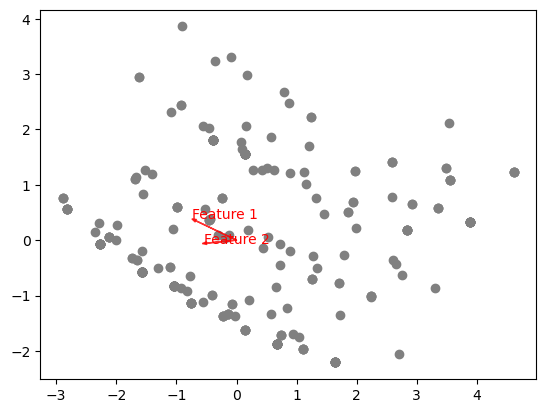

In [82]:

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.scatter(X_test[:, 0], X_test[:, 1], color='grey', label='Data Points')
features = [f"Feature {i+1}" for i in range(X_test.shape[1])]  # Example feature names
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.8, head_width=0.05)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, color='red', fontsize=10)


plt.show()

In [83]:
# Using K-means
from sklearn.cluster import KMeans
X1=X.apply(lambda x :x.apply( lambda r: 1 if r == 'Yes' else 0))
y1=y.map({'Male':1,'Female':0})


Sum of distances within clusters for 2 clusters: 1.442415641396583
Sum of distances within clusters for 3 clusters: 1.8867184019099095
Sum of distances within clusters for 4 clusters: 2.2658176595836883
Sum of distances within clusters for 5 clusters: 2.629643662516592
Sum of distances within clusters for 6 clusters: 3.1876170230610166
Sum of distances within clusters for 7 clusters: 2.9967189696169094
Sum of distances within clusters for 8 clusters: 3.217955481461528


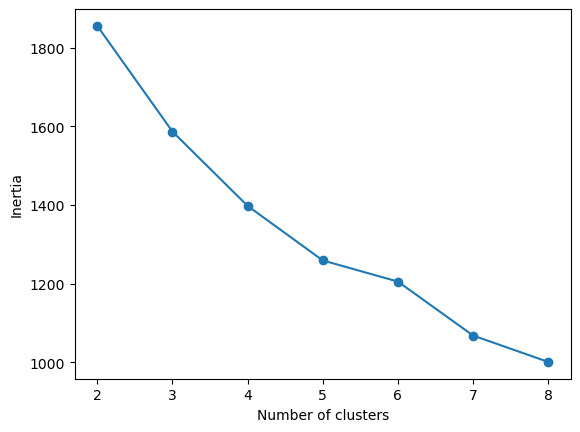

In [90]:
from sklearn.metrics import pairwise_distances_argmin_min
A = (data.iloc[:, 1:12] == 'Yes').astype(int).values
np.random.seed(1234)
inertia=[]
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(A)
    inertia.append(kmeans.inertia_)
    _, sum_distances = pairwise_distances_argmin_min(kmeans.cluster_centers_, A)
    print(f'Sum of distances within clusters for {k} clusters: {np.sum(sum_distances)}')

# plot elbow curve
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

-18780.882088157865
-19599.496866011257


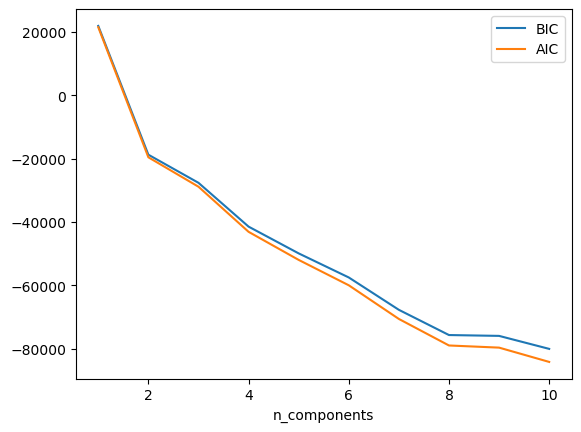

In [92]:

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import re

# Extract predictor variables and standardize the data

scaler = StandardScaler()
X_std = scaler.fit_transform(A)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10).fit(X_std)

# Print summary statistics
print(gmm.bic(X_std))
print(gmm.aic(X_std))


n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=1234, n_init=10).fit(X_std) for n in n_components]
plt.plot(n_components, [m.bic(X_std) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_std) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()